In [1]:
# loading dataset

import pandas as pd
df = pd.read_csv('model_crops.csv')

In [2]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nitrogen          500 non-null    int64  
 1   Phosphorous       500 non-null    int64  
 2   Potassium         500 non-null    int64  
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   ph                500 non-null    float64
 6   Rainfall          500 non-null    float64
 7   Crop              500 non-null    object 
 8   Moisture_Content  500 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 35.3+ KB


In [3]:
#general dataset overview
df.head()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,ph,Rainfall,Crop,Moisture_Content
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,693
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,493
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,512
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,466
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,576


In [4]:
#import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# split the dataset into input features (X) and target variable (y)
# again split into training and testing
# training is given 80%, testing 20%

X = df.drop('Crop', axis=1)
y = df['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create the model and test accuracy score

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


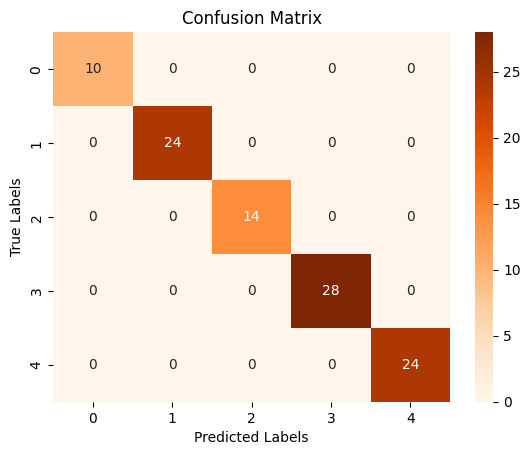

In [7]:
# illustrating model performance in a confusion matrix

from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


predictions = dec_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [17]:
# testing the application

import pandas as pd
import numpy as np

#Nitrogen, Phosphorous, Potassium, temperature, humidity, ph, rainfall, moisture content
data = {
        'Nitrogen': np.random.uniform(0, 140, 15),
        'Phosphorous': np.random.uniform(5, 145, 15),
        'Potassium': np.random.uniform(5, 205, 15),
        'Temperature': np.random.uniform(8, 43, 15),
        'Humidity': np.random.uniform(14, 99, 15),
        'ph': np.random.uniform(3, 9, 15),
        'Rainfall': np.random.uniform(20, 298, 15),
        'Moisture_Content': np.random.uniform(400, 1250, 15)

        }

dt = pd.DataFrame(data)

# Now, you can use your trained random forest model to predict the best crop for each row
predictions = dec_tree.predict(dt)

# Add the predictions to the DataFrame
dt['Predicted_Crop'] = predictions

# Print the DataFrame with the best crops for each hypothetical area
print(dt)

      Nitrogen  Phosphorous   Potassium  Temperature   Humidity        ph  \
0    13.478471    69.378858  148.836151    16.318512  83.900376  3.424298   
1    84.364892    32.008326   47.164880    23.708781  81.308930  8.200373   
2     7.206748    43.559962   72.693587    39.138931  61.426727  6.146301   
3    18.349547    21.238328   84.795395    20.146633  61.847909  4.552469   
4     5.327097    48.111365   11.246066     9.366481  95.134948  8.302149   
5   123.285414    44.614014   84.410438     8.234822  21.068215  7.215150   
6    64.447659    89.348228   97.173743    26.717500  93.429575  3.979510   
7    44.360593    37.550039  188.689079    10.455646  64.898394  6.894610   
8     4.180953   118.138903   29.637676    19.125640  51.892189  7.179356   
9    15.334710    12.928647  152.176667    11.209110  32.425814  4.078297   
10   55.001499    27.196630  107.379657    22.177744  89.615030  5.005514   
11    8.452266    52.543169  199.630715    26.937312  92.771580  3.790087   

In [18]:
#save to excel

dt.to_excel('Pred_Crops.xlsx', index=False)